In [9]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 183.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 321.9 MB/s eta 0:00:00


In [36]:
import pandas as pd

from sklearn import cluster
from sklearn.decomposition import PCA

import seaborn as sn

In [23]:
df = pd.read_csv("cord_19_embeddings_2022-06-02_test.csv", header=None)

In [24]:
df

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,768
0,ug7v899j,-2.939984,-6.312201,-1.045903,5.164163,-0.325646,-2.507413,1.735609,1.936357,0.622501,...,-0.741917,3.394711,3.163691,1.372890,-4.107113,-3.817415,1.897619,5.811529,-2.932384,0.305205
1,02tnwd4m,4.688466,-6.284460,1.228246,5.569900,5.224824,-0.406792,-2.296234,-4.276381,-0.781381,...,-0.850256,2.700679,-1.659213,-1.057281,-1.801275,0.276088,0.880289,4.176544,-5.686561,0.512474
2,ejv2xln0,0.559920,-6.754057,2.271945,7.644496,3.592816,-1.320622,-0.752549,1.384198,0.892751,...,2.043988,4.330732,-0.018087,4.812413,-2.565279,-2.131349,1.669153,4.521635,-2.847652,-1.536697
3,2b73a28n,2.352540,-3.997074,2.399774,4.594238,2.343638,1.867916,-3.466859,-3.148963,-0.073157,...,0.109116,3.492890,-3.039974,1.304383,-1.309967,-2.441383,-1.254180,-0.573785,-1.402024,3.922583
4,9785vg6d,-1.290922,-5.849864,1.557572,7.989901,5.805941,-4.537519,1.914945,-1.324861,0.861168,...,1.049299,1.902446,2.644630,1.695888,-2.386420,-3.247509,2.203239,4.226255,1.244299,-4.117685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,pci4rhkn,-5.548008,-4.750261,-1.617041,2.833446,-0.859702,1.175817,-1.719951,6.583421,-0.317879,...,-0.338292,1.553269,1.466104,-0.777664,-5.938481,-2.656920,3.489698,-0.138769,0.933665,2.856240
996,880nqc0f,0.325344,-5.330953,-0.521533,7.642685,0.553991,-0.338157,0.014227,-1.804155,-1.710893,...,-2.151987,0.199382,2.808510,1.869179,-3.452358,-4.148248,0.132914,4.169497,-3.510526,-1.418911
997,01b0vnnm,0.703593,-7.638075,3.607199,4.392560,2.973864,-2.355254,1.425045,-1.968427,0.228347,...,0.928439,-0.152826,-4.087397,-1.543801,-1.931159,-2.830865,1.996014,1.393458,-1.007870,-0.297326
998,5b29wtim,-3.255085,-4.214062,-0.225676,6.029541,0.062935,-4.796154,-1.613028,1.762303,4.759581,...,1.751127,2.252393,1.607651,-2.005697,-1.373927,-5.334787,1.998273,3.974840,-1.333735,-0.127057


In [25]:
l = []

for idx, row in df.iterrows():
    l.append(row[1:].tolist())

In [27]:
len(l[0])

768

In [30]:
clusters = cluster.KMeans(n_clusters=10).fit(l).cluster_centers_

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [31]:
clusters

array([[-1.65028345, -5.24966209,  0.21104896, ...,  3.43428151,
        -4.1151714 , -1.2793379 ],
       [-3.21676428, -4.36904316, -1.60606665, ...,  2.98049159,
         0.33827406, -0.0384278 ],
       [-1.3351863 , -3.873353  ,  0.90926183, ...,  4.80447134,
         0.40746188, -0.35385179],
       ...,
       [-3.47495365, -4.77206808,  0.48676014, ...,  2.75595395,
         0.02619535, -0.21891664],
       [-2.00500722, -5.22594881, -0.29469873, ...,  4.31744532,
        -2.87736119, -0.71943087],
       [ 0.44088644, -3.66200367,  1.91000198, ..., -3.72365141,
        -0.95732411,  0.15159063]])

In [41]:
pca = PCA(n_components=2)

result = pca.fit_transform(l)

<AxesSubplot: >

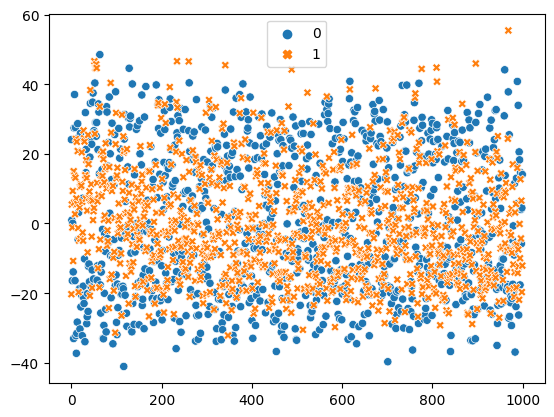

In [42]:
sn.scatterplot(result)